# Births in the United States, provided by the Centers for Disease Control (CDC)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
births_df = pd.read_csv('Data/births.csv')
births_df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [4]:
births_df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


## Years from 1969 to 2008

## Cleaning 
### check column types and null

In [5]:
births_df.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [6]:
births_df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [7]:
births_df.query('(year>=1990)&(year<=2000)')
#days is missing in Dataset from 1990 until 2000

,year,month,day,gender,births
15091,1990,1,NaN,F,163576
15092,1990,1,NaN,M,172073
15093,1990,2,NaN,F,153015
15094,1990,2,NaN,M,159915
15095,1990,3,NaN,F,171463
...,...,...,...,...,...
15350,2000,10,NaN,M,176350
15351,2000,11,NaN,F,164086
15352,2000,11,NaN,M,170206
15353,2000,12,NaN,F,164939


In [8]:
births_df[births_df['day'].isnull()] # I think best choice for null days is zero 

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [9]:
births_df['day'].fillna(0,inplace=True)
births_df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [10]:
# Day is float64 but I think it should to be int
births_df['day'] = births_df['day'].astype('int64')
births_df.dtypes

year       int64
month      int64
day        int64
gender    object
births     int64
dtype: object

## Decades column


In [11]:
births_df['decades'] = 10 * (births_df['year']//10)
births_df['decades'].unique() 

array([1960, 1970, 1980, 1990, 2000], dtype=int64)

In [12]:
births_df.groupby(['decades','gender'])['births'].agg('sum')

decades  gender
1960     F          1753634
         M          1846572
1970     F         16263075
         M         17121550
1980     F         18310351
         M         19243452
1990     F         19479454
         M         20420553
2000     F         18229309
         M         19106428
Name: births, dtype: int64

In [13]:
# same results with another way -- pandas is powerful
births_decades_df= births_df.pivot_table('births',index='decades',columns=['gender'],aggfunc='sum')
births_decades_df

gender,F,M
decades,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


# Visualisation for decades with gender 

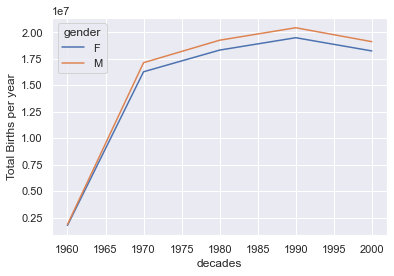

In [14]:
sns.set()
births_decades_df.plot()
plt.ylabel('Total Births per year')
plt.show()

## As you see from 1965 Male are increased than Female

In [15]:
births_df['births']

0          4046
1          4440
2          4454
3          4548
4          4548
          ...  
15542    183219
15543    158939
15544    165468
15545    173215
15546    181235
Name: births, Length: 15547, dtype: int64

## Working with outliers

In [16]:
quartiles = np.percentile(births_df['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [17]:
mu = quartiles[1]
sigma = 0.74 * (quartiles[2]-quartiles[0])
sigma,mu

(689.31, 4814.0)

In [18]:
lower,upper=(mu - 5 * sigma),(mu + 5 * sigma)
lower,upper

(1367.4500000000003, 8260.55)

## Use sigma-clipping to detect and remove outliers

In [19]:
births_without_outliers_df = births_df.query('(births > @lower) & (births < @upper)')
births_without_outliers_df

,year,month,day,gender,births,decades
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [31]:
# Add date column consist of day , month , year
births_without_outliers_df.index = pd.to_datetime(10000 * births_without_outliers_df.year +
                              100 * births_without_outliers_df.month +
                              births_without_outliers_df.day, format='%Y%m%d')
births_without_outliers_df             

,year,month,day,gender,births,decades,date
1969-01-01,1969,1,1,F,4046,1960,0
1969-01-01,1969,1,1,M,4440,1960,1
1969-01-02,1969,1,2,F,4454,1960,2
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,15062
1988-12-30,1988,12,30,F,5742,1980,15063
1988-12-30,1988,12,30,M,6095,1980,15064
1988-12-31,1988,12,31,F,4435,1980,15065


In [33]:
births_without_outliers_df['dayofweek'] = births_without_outliers_df.index.dayofweek
births_without_outliers_df

C:\Users\Omar Wael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,gender,births,decades,date,dayofweek
1969-01-01,1969,1,1,F,4046,1960,0,2
1969-01-01,1969,1,1,M,4440,1960,1,2
1969-01-02,1969,1,2,F,4454,1960,2,3
1969-01-02,1969,1,2,M,4548,1960,3,3
1969-01-03,1969,1,3,F,4548,1960,4,4
...,...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,15062,3
1988-12-30,1988,12,30,F,5742,1980,15063,4
1988-12-30,1988,12,30,M,6095,1980,15064,4
1988-12-31,1988,12,31,F,4435,1980,15065,5


In [34]:
df = births_without_outliers_df

In [27]:
df['date'] = df.index

C:\Users\Omar Wael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\Omar Wael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


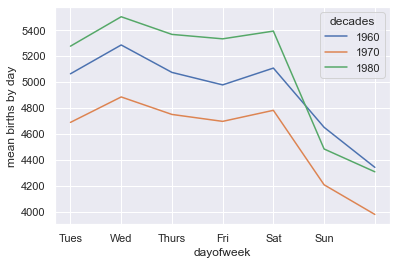

In [35]:
df.pivot_table('births',index='dayofweek',columns='decades',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

## Births are less in weekends than weekdays

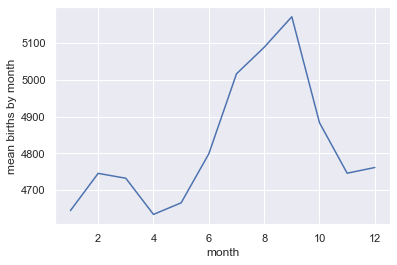

In [48]:
df.groupby('month')['births'].agg('mean').plot()
#plt.gca().set_xticklabels(range(0,13))
plt.ylabel('mean births by month');
plt.show()

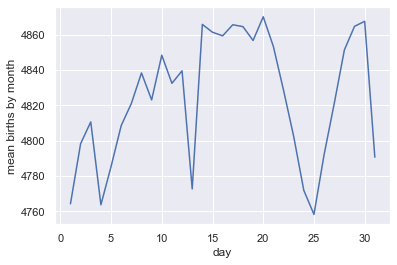

In [49]:
df.groupby('day')['births'].agg('mean').plot()
#plt.gca().set_xticklabels(range(0,13))
plt.ylabel('mean births by month');
plt.show()

# Amazing till now , feel free to contribute